# Sentiment Classification using LSTM

In [1]:
import tensorflow as tf
import numpy as np

np.__version__

'1.19.5'

In [2]:
max_features = 20_000
max_len = 200

In [3]:
(X_train, y_train ), (X_test, y_test )= tf.keras.datasets.imdb.load_data(num_words=max_features)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/siro/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/siro/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [4]:
X_train.shape, y_train.shape

((25000,), (25000,))

In [5]:
X_train_padded_seq = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len, truncating='post',padding='post')

In [6]:
X_test_padded_seq = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len, truncating='post',padding='post')

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True, activation='tanh')),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True, activation='tanh')),
    tf.keras.layers.TimeDistributed( tf.keras.layers.Dense(1, activation='sigmoid'))
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-30 13:11:51.736827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-30 13:11:51.736940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 128)          98816     
_________________________________________________________________
time_distributed (TimeDistri (None, 200, 1)            129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
EPOCHS = 5
BATCH_SIZE = 32

history = model.fit(X_train_padded_seq, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_padded_seq, y_test))

2022-03-30 13:13:18.217119: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-30 13:13:18.217284: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-03-30 13:13:19.483502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:13:19.722719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:13:19.731623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:13:20.296789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:13:20.305694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:13:21.234181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:13:21.234944: I tensorflow/core/grappler/optimizers/cust

782/782 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.7816

2022-03-30 13:15:39.540648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:15:39.621170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:15:39.627619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:15:40.050637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 13:15:40.056988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 219s 273ms/step - loss: 0.4685 - accuracy: 0.7816 - val_loss: 0.4071 - val_accuracy: 0.8244
Epoch 2/5
782/782 [==============================] - 210s 268ms/step - loss: 0.3425 - accuracy: 0.8677 - val_loss: 0.4976 - val_accuracy: 0.7426
Epoch 3/5
782/782 [==============================] - 215s 275ms/step - loss: 0.4580 - accuracy: 0.7937 - val_loss: 0.3931 - val_accuracy: 0.8363
Epoch 4/5
782/782 [==============================] - 218s 279ms/step - loss: 0.2155 - accuracy: 0.9196 - val_loss: 0.3791 - val_accuracy: 0.8450
Epoch 5/5
782/782 [==============================] - 230s 294ms/step - loss: 0.1322 - accuracy: 0.9564 - val_loss: 0.4457 - val_accuracy: 0.8365


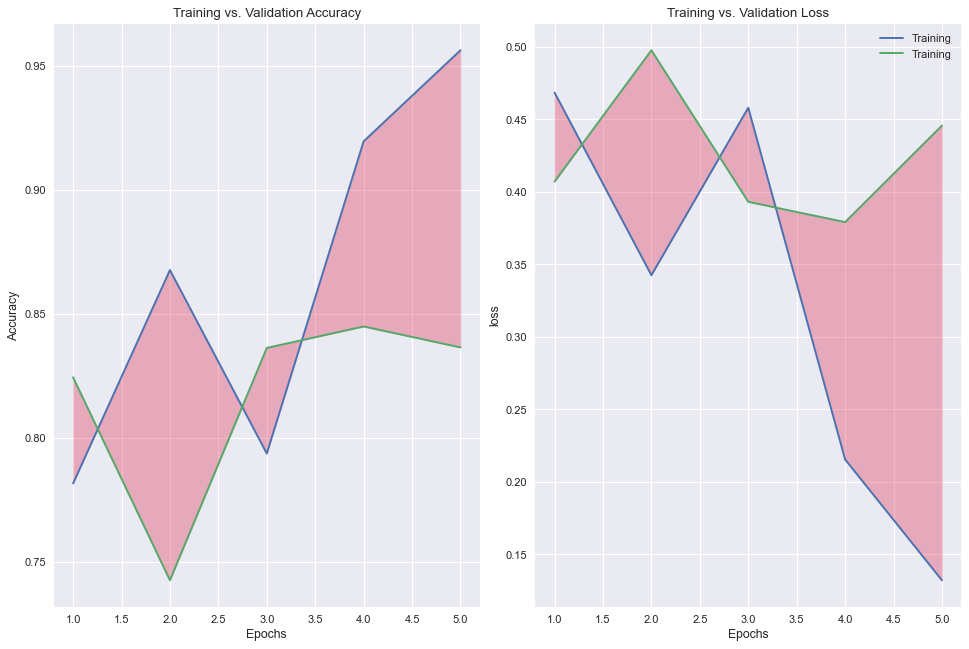

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epo = range(1, len(acc)+1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12,8), dpi=80)
plt.style.use('seaborn')

ax[0].plot(epo, acc, label='Training')
ax[0].plot(epo, val_acc, label='Validation')
ax[0].plot(alpha=0.3)
ax[0].title.set_text('Training vs. Validation Accuracy')
ax[0].fill_between(epo, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs', ylabel='Accuracy')

ax[1].plot(epo, loss, label='Training')
ax[1].plot(epo, val_loss, label='Training')
ax[1].plot(alpha=0.3)
ax[1].title.set_text('Training vs. Validation Loss')
ax[1].fill_between(epo, loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs', ylabel='loss')
plt.legend()